## Step 1: Identifying Outlier Dates and Generate Date Ranges

## Step 2: Retrieve Hourly Data

In [1]:
import pandas as pd
import requests
from datetime import timedelta

def convert_timestamps(df):
    df['date'] = pd.to_datetime(df['t'], unit='ms')
    df.drop(columns=['t'], inplace=True)
    return df

def calculate_daily_returns(df, prev_close=None):
    if prev_close is not None:
        df.loc[df.index[0], 'prev_close'] = prev_close
    else:
        df['prev_close'] = df['c'].shift(1)
    df['daily_return'] = (df['c'] - df['prev_close']) / df['prev_close']
    df['abs_daily_return'] = df['daily_return'].abs()
    return df

def fetch_hourly_data(symbol, start_date, end_date, api_key):
    url = f"https://api.polygon.io/v2/aggs/ticker/{symbol}/range/1/hour/{start_date}/{end_date}?apiKey={api_key}"
    response = requests.get(url)
    hourly_data = pd.DataFrame(response.json()['results'])
    hourly_data = convert_timestamps(hourly_data)
    hourly_data = calculate_daily_returns(hourly_data)
    return hourly_data

# Load the dataset
data = pd.read_csv('Outlier Dataset.csv')
data['date'] = pd.to_datetime(data['date'])

# Filter rows where 'outlier' is 1
outliers = data[data['outlier'] == 1]

# Generate date ranges for each outlier
date_ranges = pd.DataFrame({
    "start_date": outliers['date'] - timedelta(days=3),
    "end_date": outliers['date'] + timedelta(days=3),
})

api_key = 'beBybSi8daPgsTp5yx5cHtHpYcrjp5Jq'
symbol = 'C:USDEUR'
all_hourly_data = pd.DataFrame()

# Fetch and process hourly data for each outlier
for index, row in date_ranges.iterrows():
    hourly_data = fetch_hourly_data(symbol, row['start_date'].date(), row['end_date'].date(), api_key)
    all_hourly_data = pd.concat([all_hourly_data, hourly_data], ignore_index=True)

all_hourly_data

,v,vw,o,c,h,l,n,date,prev_close,daily_return,abs_daily_return
0,75,0.9113,0.91113,0.91130,0.91186,0.91101,75,2023-07-09 20:00:00,NaN,NaN,NaN
1,198,0.9117,0.91130,0.91177,0.91195,0.91130,198,2023-07-09 21:00:00,0.91130,0.000516,0.000516
2,1491,0.9118,0.91174,0.91183,0.91191,0.91155,1491,2023-07-09 22:00:00,0.91177,0.000066,0.000066
3,1035,0.9119,0.91186,0.91160,0.91218,0.91150,1035,2023-07-09 23:00:00,0.91183,-0.000252,0.000252
4,2351,0.9123,0.91178,0.91203,0.91263,0.91150,2351,2023-07-10 00:00:00,0.91160,0.000472,0.000472
...,...,...,...,...,...,...,...,...,...,...,...
834,2810,0.9182,0.91820,0.91805,0.91842,0.91740,2810,2024-06-07 06:00:00,0.91819,-0.000152,0.000152
835,3754,0.9179,0.91806,0.91803,0.91829,0.91730,3754,2024-06-07 07:00:00,0.91805,-0.000022,0.000022
836,3785,0.9184,0.91802,0.91826,0.91882,0.91790,3785,2024-06-07 08:00:00,0.91803,0.000251,0.000251
837,3558,0.9180,0.91824,0.91809,0.91842,0.91750,3558,2024-06-07 09:00:00,0.91826,-0.000185,0.000185


In [2]:
# all_hourly_data.to_csv('hourly_data.csv')

In [3]:
all_hourly_data.drop(columns=['prev_close', 'daily_return', 'abs_daily_return'])

all_hourly_data

,v,vw,o,c,h,l,n,date,prev_close,daily_return,abs_daily_return
0,75,0.9113,0.91113,0.91130,0.91186,0.91101,75,2023-07-09 20:00:00,NaN,NaN,NaN
1,198,0.9117,0.91130,0.91177,0.91195,0.91130,198,2023-07-09 21:00:00,0.91130,0.000516,0.000516
2,1491,0.9118,0.91174,0.91183,0.91191,0.91155,1491,2023-07-09 22:00:00,0.91177,0.000066,0.000066
3,1035,0.9119,0.91186,0.91160,0.91218,0.91150,1035,2023-07-09 23:00:00,0.91183,-0.000252,0.000252
4,2351,0.9123,0.91178,0.91203,0.91263,0.91150,2351,2023-07-10 00:00:00,0.91160,0.000472,0.000472
...,...,...,...,...,...,...,...,...,...,...,...
834,2810,0.9182,0.91820,0.91805,0.91842,0.91740,2810,2024-06-07 06:00:00,0.91819,-0.000152,0.000152
835,3754,0.9179,0.91806,0.91803,0.91829,0.91730,3754,2024-06-07 07:00:00,0.91805,-0.000022,0.000022
836,3785,0.9184,0.91802,0.91826,0.91882,0.91790,3785,2024-06-07 08:00:00,0.91803,0.000251,0.000251
837,3558,0.9180,0.91824,0.91809,0.91842,0.91750,3558,2024-06-07 09:00:00,0.91826,-0.000185,0.000185


In [4]:
from sklearn.preprocessing import StandardScaler

# Fill missing values
all_hourly_data.fillna(method='ffill', inplace=True)  # forward fill

# Normalize all_hourly_data
scaler = StandardScaler()
all_hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']] = scaler.fit_transform(all_hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']])

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/636711002.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_hourly_data.fillna(method='ffill', inplace=True)  # forward fill


## Step 3: Model Building

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare all_hourly_data for LSTM (assuming 'c' is what we want to predict)
n_features = 1
n_timesteps = 3  # Number of timesteps per sequence
X = []
y = []

for i in range(n_timesteps, len(all_hourly_data)):
    X.append(all_hourly_data[['c']].iloc[i-n_timesteps:i].values)
    y.append(all_hourly_data['c'].iloc[i])

X = np.array(X)
y = np.array(y)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, verbose=1)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0929
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6412
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2338
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0306 
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0238 
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242 
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0192
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0277
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0201 
Epoch 13/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261
Epoch 14/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0321
Epoch 15/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0219 
Epoch 16/20
27

## Step 4: Data Augmentation (Synthetic Data Generation)

In [6]:
# Predict the next points
predicted = model.predict(X)

# Introduce small variations
noise = np.random.normal(0, 0.01, predicted.shape)
synthetic_data = predicted + noise

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


## Step 5: Evaluation

In [7]:
# Compare correlation
from scipy.stats import pearsonr

real_data = all_hourly_data['c'].iloc[n_timesteps:].values
correlation, _ = pearsonr(real_data, synthetic_data.flatten())
print(f'Correlation between real and synthetic data: {correlation}')


Correlation between real and synthetic data: 0.9884240919487923


## Step 6: Visualize

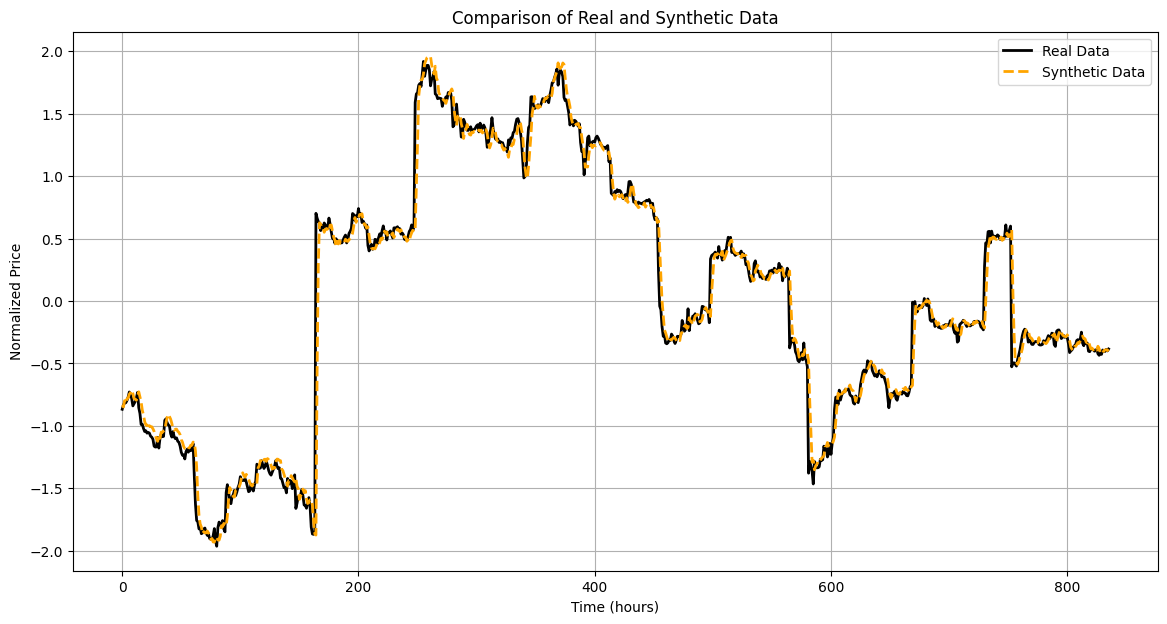

In [8]:
import matplotlib.pyplot as plt

# Assuming 'real_data' contains the actual closing prices and 'synthetic_data' contains the generated prices

# Plotting real vs synthetic data
plt.figure(figsize=(14, 7))
plt.plot(real_data, label='Real Data', color='black', linewidth=2)
plt.plot(synthetic_data.flatten(), label='Synthetic Data', color='orange', linestyle='--', linewidth=2)
plt.title('Comparison of Real and Synthetic Data')
plt.xlabel('Time (hours)')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()


## Visualization of All the outliers at once

Epoch 1/20


/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/2465635574.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9696  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9473 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8348 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8083 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7848 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7629 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7033 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6551 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6464 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5754 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5575 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4898 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4803 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4020 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3771 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/2465635574.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9415  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9734 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9432 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8717 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8696 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9182 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7993 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7682 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7622 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6898 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6598 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6523 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6210 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5552 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6368 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/2465635574.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0050
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9298 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8579 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8638 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8694 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7860 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8253 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7329 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7201 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6680 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6615 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6412 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6676 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6130 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5567 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/2465635574.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9567  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9933 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9381 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8513 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7755 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7613 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7973 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6911 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6401 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6624 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6146 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5520 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5076 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4865 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4548 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/2465635574.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0405  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9761 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9512 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9476 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8347 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9219 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8426 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8450 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7748 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7214 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6640 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6962 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6055 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6029 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5553 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/2465635574.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.8715
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8228 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7854 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7651 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7078 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6745 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6352 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5960 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5424 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5010 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4491 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4113 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3706 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3127 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2782 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/2465635574.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0189  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9958 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9586 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8443 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9052 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8577 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7571 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7946 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7350 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6917 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6252 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5688 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5116 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4944 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4586 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/2465635574.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1331
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0278 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9346 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8484 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8837 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7652 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8756 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7705 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6953 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6807 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6272 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6258 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6214 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5368 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5449 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/2465635574.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1887  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1101 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0391 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0114 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9535 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9062 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8258 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8511 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7682 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7655 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7347 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6572 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5959 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6004 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5244 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/2465635574.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7390  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6666 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6598 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6546 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6334 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6324 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6104 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5242 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5181 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4996 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5152 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4737 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4406 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4329 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4219 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

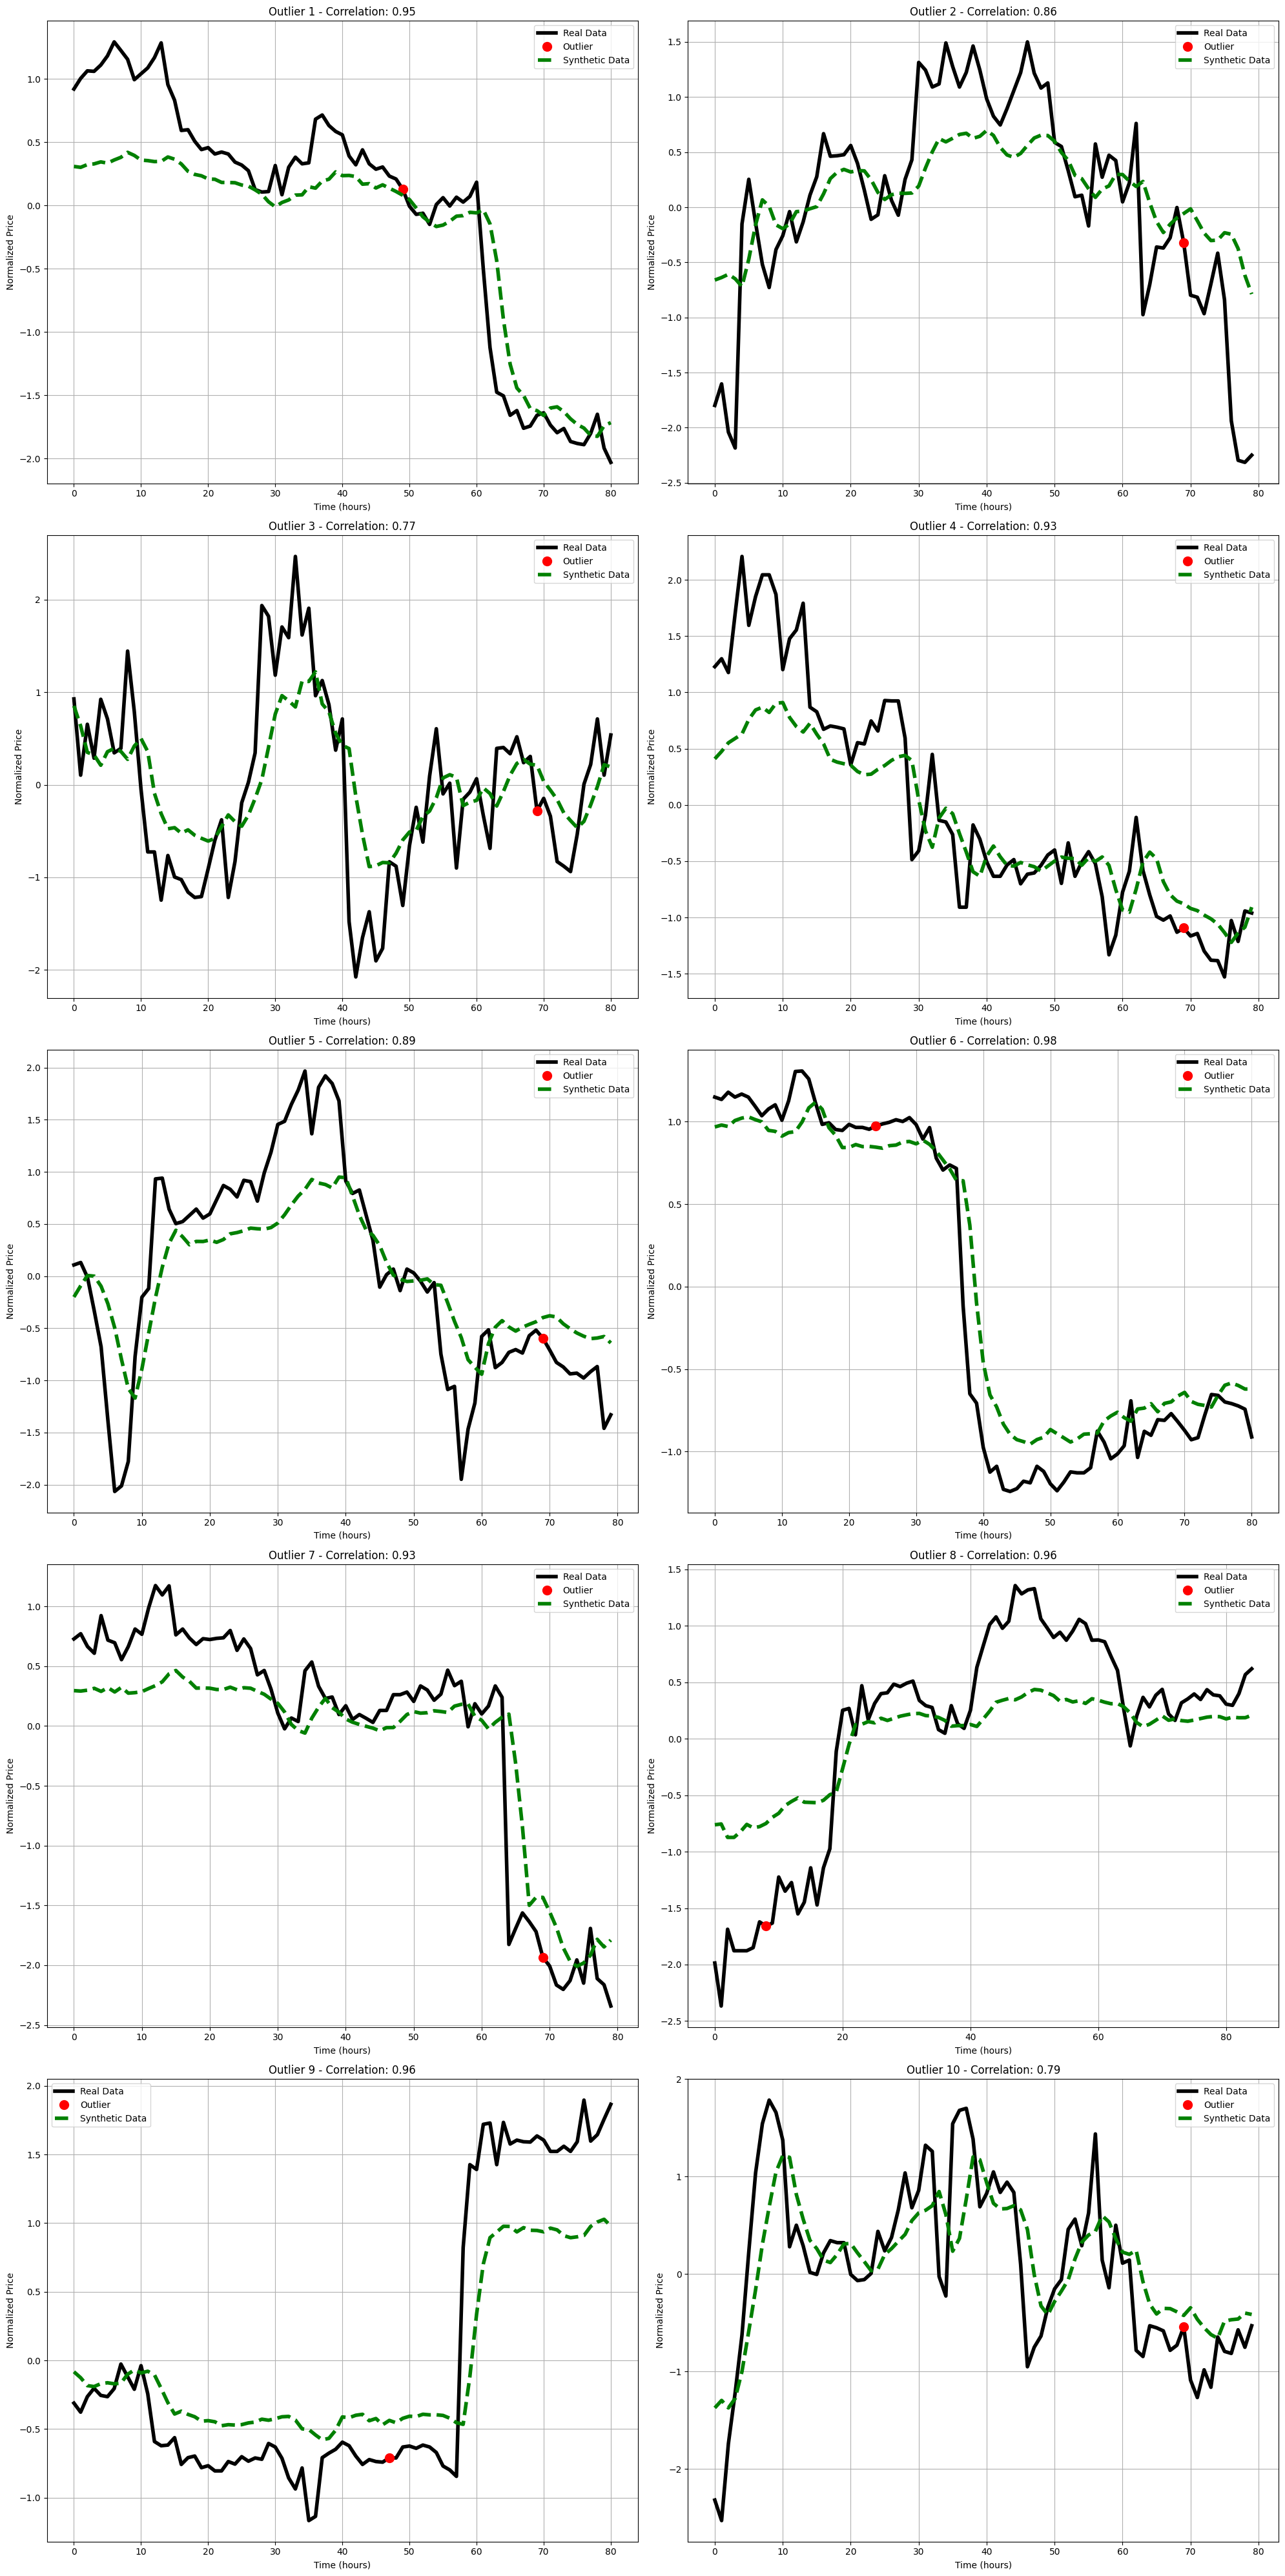

In [11]:
import pandas as pd
import requests
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def convert_timestamps(df):
    df['date'] = pd.to_datetime(df['t'], unit='ms')
    df.drop(columns=['t'], inplace=True)
    return df

def calculate_daily_returns(df, prev_close=None):
    if prev_close is not None:
        df.loc[df.index[0], 'prev_close'] = prev_close
    else:
        df['prev_close'] = df['c'].shift(1)
    df['daily_return'] = (df['c'] - df['prev_close']) / df['prev_close']
    df['abs_daily_return'] = df['daily_return'].abs()
    return df

def fetch_hourly_data(symbol, start_date, end_date, api_key):
    url = f"https://api.polygon.io/v2/aggs/ticker/{symbol}/range/1/hour/{start_date}/{end_date}?apiKey={api_key}"
    response = requests.get(url)
    hourly_data = pd.DataFrame(response.json()['results'])
    hourly_data = convert_timestamps(hourly_data)
    hourly_data = calculate_daily_returns(hourly_data)
    return hourly_data

# Load the dataset
data = pd.read_csv('Outlier Dataset.csv')
data['date'] = pd.to_datetime(data['date'])

# Filter rows where 'outlier' is 1
outliers = data[data['outlier'] == 1]

# Generate date ranges for each outlier
date_ranges = pd.DataFrame({
    "start_date": outliers['date'] - timedelta(days=3),
    "end_date": outliers['date'] + timedelta(days=3),
    "outlier_date": outliers['date']
})

api_key = 'beBybSi8daPgsTp5yx5cHtHpYcrjp5Jq'
symbol = 'C:USDEUR'

# Plotting setup
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 40))
axs = axs.flatten()

# Process each date range
for idx, (ax, (_, row)) in enumerate(zip(axs, date_ranges.iterrows())):
    hourly_data = fetch_hourly_data(symbol, row['start_date'].date(), row['end_date'].date(), api_key)
    
    # Fill missing values
    hourly_data.fillna(method='ffill', inplace=True)  # forward fill

    # Normalize data
    scaler = StandardScaler()
    hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']] = scaler.fit_transform(hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']])

    # Prepare data for LSTM
    n_features = 1
    n_timesteps = 3  # Number of timesteps per sequence
    X = []
    y = []

    for i in range(n_timesteps, len(hourly_data)):
        X.append(hourly_data[['c']].iloc[i-n_timesteps:i].values)
        y.append(hourly_data['c'].iloc[i])

    X = np.array(X)
    y = np.array(y)

    # Build and fit LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=20, verbose=1)

    # Predict and generate synthetic data
    predicted = model.predict(X)
    noise = np.random.normal(0, 0.01, predicted.shape)
    synthetic_data = predicted + noise

    # Correlation calculation
    real_data = hourly_data['c'].iloc[n_timesteps:].values
    correlation, _ = pearsonr(real_data, synthetic_data.flatten())
    print(f'Packet {idx+1} - Correlation: {correlation}')

    # Find index of the outlier in the normalized data
    outlier_index = hourly_data.index[hourly_data['date'] == row['outlier_date']]
    
    # Plotting real vs synthetic data
    ax.plot(real_data, label='Real Data', color='black', linewidth=4)
    if not outlier_index.empty:
        ax.plot(outlier_index[0] - n_timesteps, real_data[outlier_index[0] - n_timesteps], 'ro', markersize=10, label='Outlier')  # Mark the outlier with a larger red dot
    ax.plot(synthetic_data.flatten(), label='Synthetic Data', color='green', linestyle='--', linewidth=4)
    ax.set_title(f'Outlier {idx + 1} - Correlation: {correlation:.2f}')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Normalized Price')
    ax.legend()
    ax.grid(True)

# Display all the plots
plt.tight_layout()
plt.show()

## Landscape Visual

Epoch 1/20


/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/1681904110.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9444  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9259 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8355 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8088 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8093 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7399 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6504 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6354 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6159 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5643 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4953 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4557 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4397 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3693 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3454 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/1681904110.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8246
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8327 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7830 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8011 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7108 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7670 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6975 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6214 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6643 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6055 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5880 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5114 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5148 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4925 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4431 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/1681904110.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8856  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9294 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7872 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8785 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7990 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6918 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6761 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7661 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6870 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6223 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6246 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5842 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5666 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5561 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5770 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/1681904110.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0439  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9023 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8732 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8762 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8054 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7510 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7222 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6894 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6198 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6003 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5274 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4872 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4848 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4393 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3947 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/1681904110.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0239  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0163 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9559 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8778 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8475 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7768 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7833 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7072 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6567 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6405 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6236 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5852 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5794 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4936 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4998 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/1681904110.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8901  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8602 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8127 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7662 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7319 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6915 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6418 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5799 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5443 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5223 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4794 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4330 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3984 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3596 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3153 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/1681904110.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1954
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0390 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9851 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0970 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9256 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8768 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8539 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8601 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8060 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7199 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7085 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6773 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6405 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5839 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5770 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/1681904110.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9210  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7708 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7388 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7633 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6635 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6705 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6502 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6190 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5267 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5361 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4446 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4488 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3563 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3033 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2726 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/1681904110.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0013  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9903 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9975 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9085 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8296 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8326 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8674 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7735 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7279 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7293 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6604 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5777 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5605 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5205 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4880 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_40262/1681904110.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7645
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8172 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8322 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7302 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7726 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8252 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7288 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7135 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6857 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5683 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6266 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6129 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5843 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5260 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5278 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

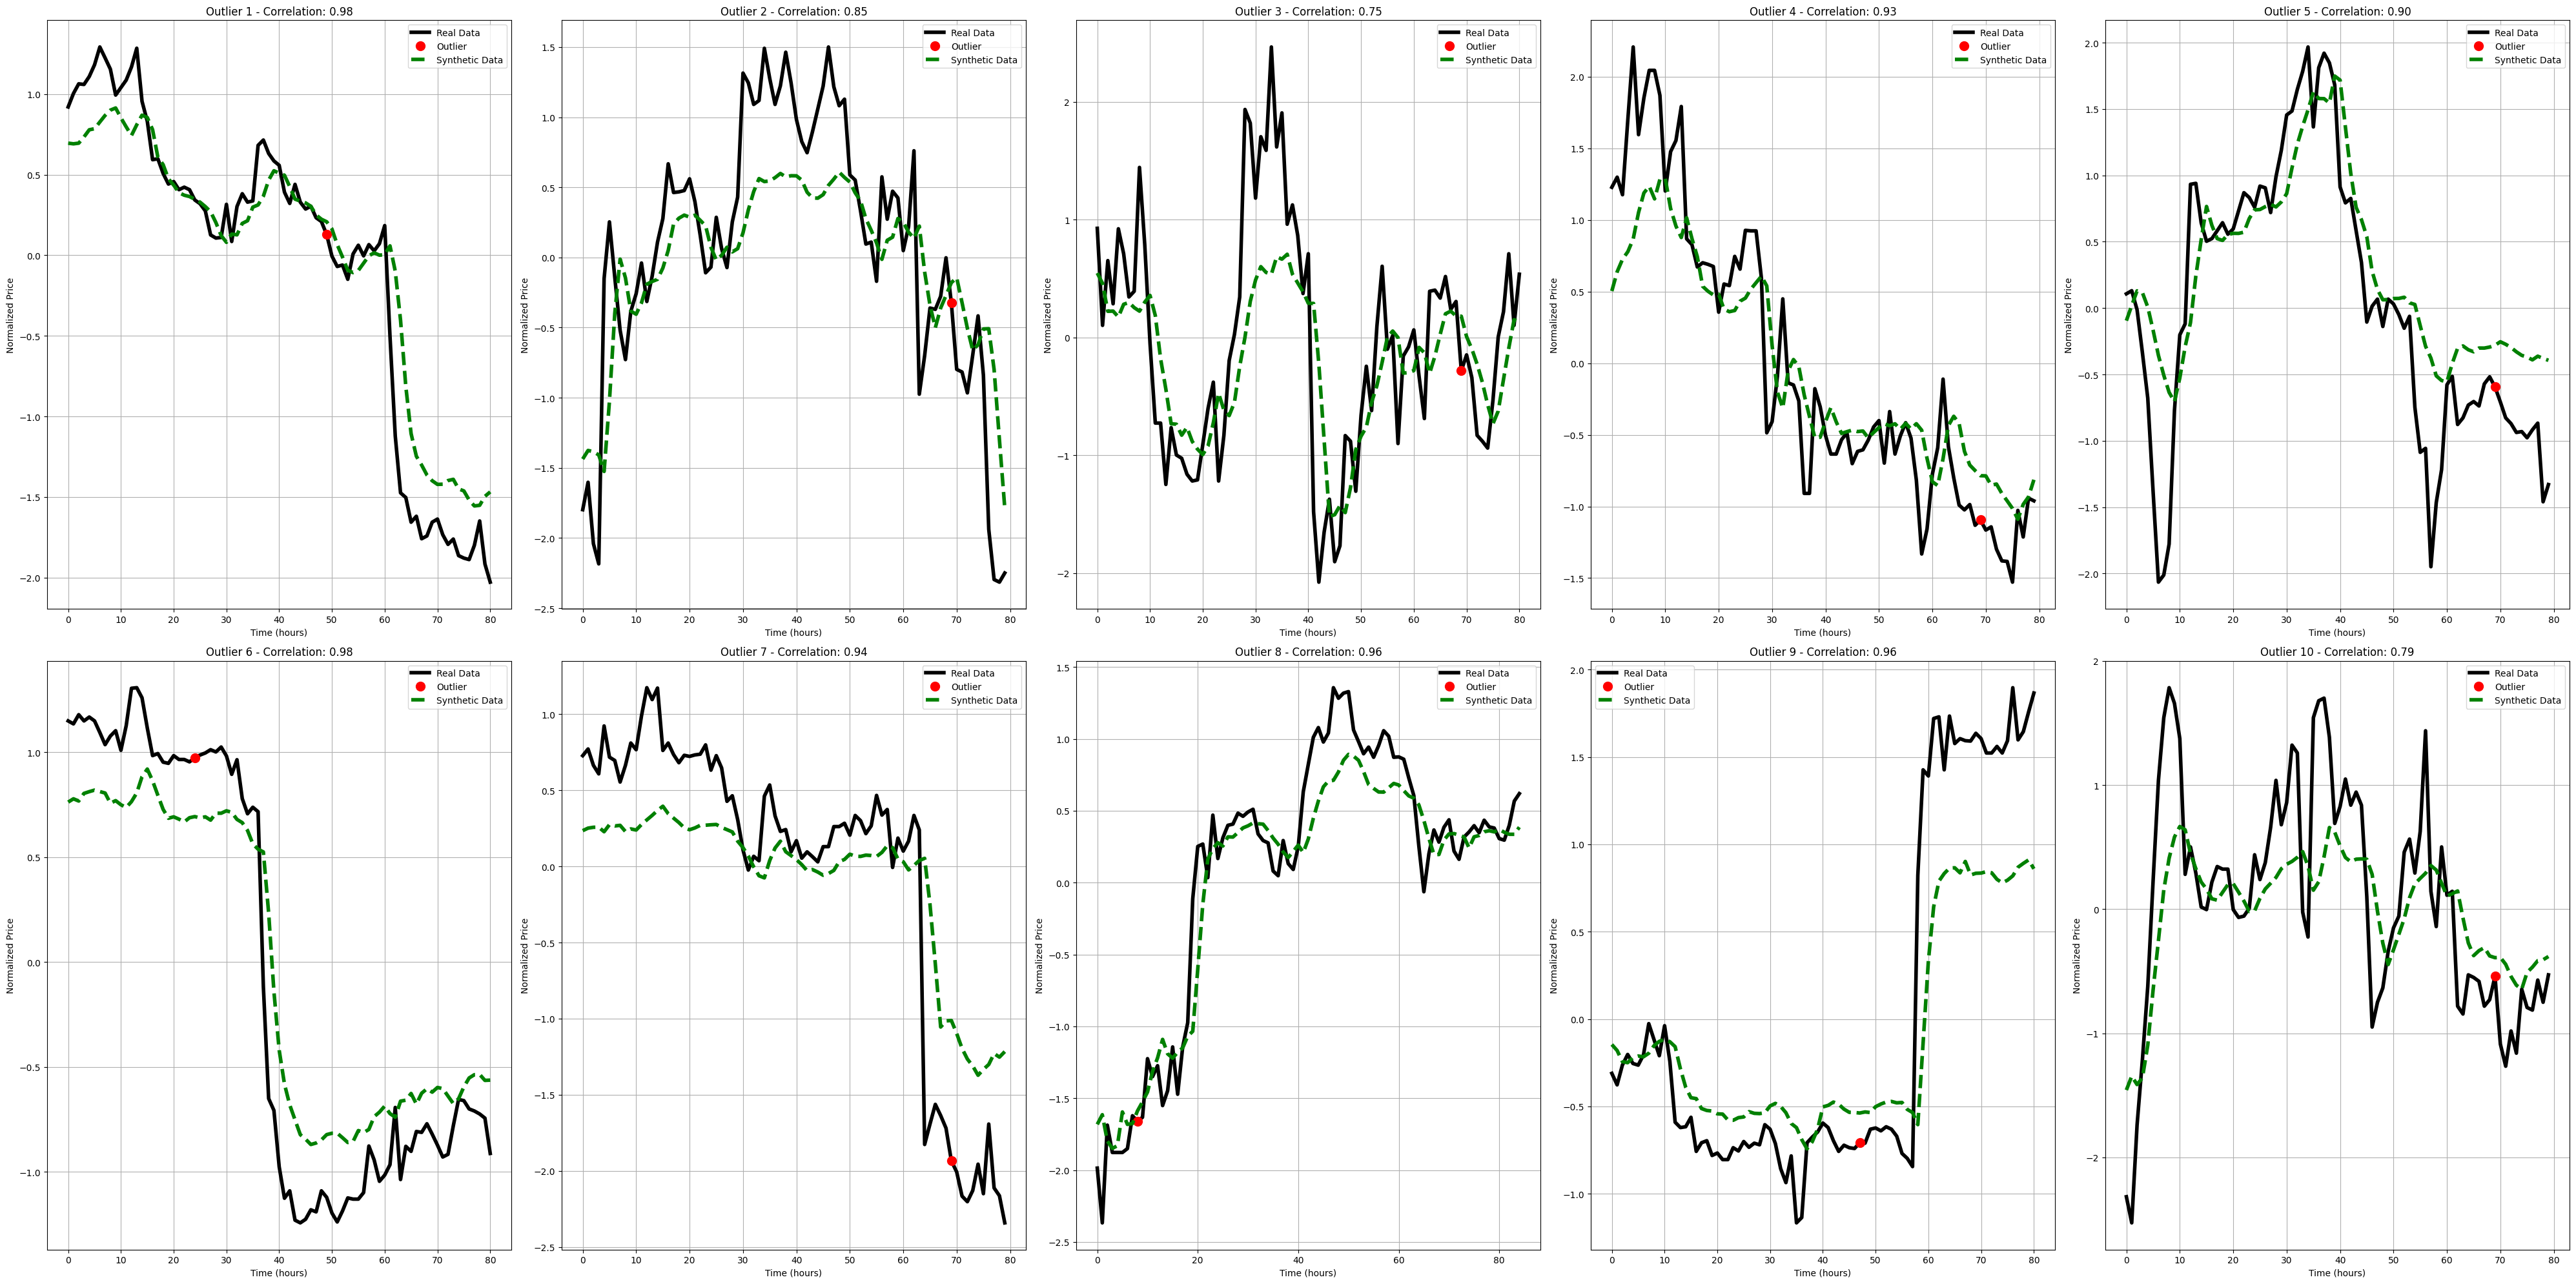

In [12]:
import pandas as pd
import requests
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def convert_timestamps(df):
    df['date'] = pd.to_datetime(df['t'], unit='ms')
    df.drop(columns=['t'], inplace=True)
    return df

def calculate_daily_returns(df, prev_close=None):
    if prev_close is not None:
        df.loc[df.index[0], 'prev_close'] = prev_close
    else:
        df['prev_close'] = df['c'].shift(1)
    df['daily_return'] = (df['c'] - df['prev_close']) / df['prev_close']
    df['abs_daily_return'] = df['daily_return'].abs()
    return df

def fetch_hourly_data(symbol, start_date, end_date, api_key):
    url = f"https://api.polygon.io/v2/aggs/ticker/{symbol}/range/1/hour/{start_date}/{end_date}?apiKey={api_key}"
    response = requests.get(url)
    hourly_data = pd.DataFrame(response.json()['results'])
    hourly_data = convert_timestamps(hourly_data)
    hourly_data = calculate_daily_returns(hourly_data)
    return hourly_data

# Load the dataset
data = pd.read_csv('Outlier Dataset.csv')
data['date'] = pd.to_datetime(data['date'])

# Filter rows where 'outlier' is 1
outliers = data[data['outlier'] == 1]

# Generate date ranges for each outlier
date_ranges = pd.DataFrame({
    "start_date": outliers['date'] - timedelta(days=3),
    "end_date": outliers['date'] + timedelta(days=3),
    "outlier_date": outliers['date']
})

api_key = 'beBybSi8daPgsTp5yx5cHtHpYcrjp5Jq'
symbol = 'C:USDEUR'

# Plotting setup
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(40, 20))
axs = axs.flatten()

# Process each date range
for idx, (ax, (_, row)) in enumerate(zip(axs, date_ranges.iterrows())):
    hourly_data = fetch_hourly_data(symbol, row['start_date'].date(), row['end_date'].date(), api_key)
    
    # Fill missing values
    hourly_data.fillna(method='ffill', inplace=True)  # forward fill

    # Normalize data
    scaler = StandardScaler()
    hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']] = scaler.fit_transform(hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']])

    # Prepare data for LSTM
    n_features = 1
    n_timesteps = 3  # Number of timesteps per sequence
    X = []
    y = []

    for i in range(n_timesteps, len(hourly_data)):
        X.append(hourly_data[['c']].iloc[i-n_timesteps:i].values)
        y.append(hourly_data['c'].iloc[i])

    X = np.array(X)
    y = np.array(y)

    # Build and fit LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=20, verbose=1)

    # Predict and generate synthetic data
    predicted = model.predict(X)
    noise = np.random.normal(0, 0.01, predicted.shape)
    synthetic_data = predicted + noise

    # Correlation calculation
    real_data = hourly_data['c'].iloc[n_timesteps:].values
    correlation, _ = pearsonr(real_data, synthetic_data.flatten())
    print(f'Outlier {idx+1} - Correlation: {correlation}')

    # Find index of the outlier in the normalized data
    outlier_index = hourly_data.index[hourly_data['date'] == row['outlier_date']]
    
    # Plotting real vs synthetic data
    ax.plot(real_data, label='Real Data', color='black', linewidth=4)
    if not outlier_index.empty:
        ax.plot(outlier_index[0] - n_timesteps, real_data[outlier_index[0] - n_timesteps], 'ro', markersize=10, label='Outlier')  # Mark the outlier with a larger red dot
    ax.plot(synthetic_data.flatten(), label='Synthetic Data', color='green', linestyle='--', linewidth=4)
    ax.set_title(f'Outlier {idx + 1} - Correlation: {correlation:.2f}')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Normalized Price')
    ax.legend()
    ax.grid(True)

# Display all the plots
plt.tight_layout()
plt.show()